In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.stats.multitest as smm

In [11]:
ROOT = '/data1/wgs_APA/validation_res/'
GEM0 = 'gem0/'
GEM1 = 'gem1/'
MAAPER_OUT = 'MAAPER_out/'

In [12]:
genes = [d.split('_')[0] for d in os.listdir(f'{ROOT}{GEM1}{MAAPER_OUT}')]

In [13]:
def adjust_pvalues(df):
    """
    Adjust the p-values in the 'REDu.pval' column of the dataframe using the FDR method.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the 'REDu.pval' column.
    
    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'adjusted.pval' column.
    """
    
    # Extract the p-values from the dataframe
    pvals = df['REDu.pval'].values
    
    # Adjust the p-values using the Benjamini-Hochberg procedure
    adjusted_pvals = smm.multipletests(pvals, method='fdr_bh')[1]
    
    # Add the adjusted p-values to the dataframe
    df['adjusted.pval'] = adjusted_pvals
    
    return df

In [31]:
gem0 = {}
gem1 = {}
for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM0}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            gem0[gene] = df
        except:
            continue


for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM1}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            gem1[gene] = df
        except:
            continue


In [34]:
# Find shared genes
shared_genes = set(gem0.keys()) & set(gem1.keys())

# Calculate correlations
correlations = {}

for gene in shared_genes:
    df0 = gem0[gene]
    df1 = gem1[gene]
    
    merged_df = pd.merge(df0, df1, on='gene', suffixes=('_gem0', '_gem1'))
    # Sort by 'gene' for consistency
    sorted_df = merged_df.sort_values(by='gene')
    # remove the NA values in REDu_gem0 and REDu_gem1
    sorted_df = sorted_df[~sorted_df['REDu_gem0'].isin([np.nan, np.inf, -np.inf])]
    # Calculate correlation for the 'REDu' columns from both data frames
    correlation = sorted_df['REDu_gem0'].corr(sorted_df['REDu_gem1'])
    correlations[gene] = correlation

print("Correlations:", correlations)

Correlations: {'KLF9': -0.09823440644116053, 'RDH11': -0.029084183652348914, 'KCNIP3': -0.06266041834818709, 'MED1': -0.3521935400743669, 'ENSA': -0.2383330233509859, 'UBE2D2': 0.20342052297059804, 'PHAX': -0.07012503741389264, 'NFIB': 0.0015135349154847785, 'RBM15B': 0.3595220149124504, 'TEAD3': 0.058920790078989455, 'IFITM2': -0.21817311397638559, 'LRRC14': -0.18277370772172624, 'MRPL9': -0.10296593833519205, 'ZNF215': -0.1433029317772989, 'GSC2': -0.25868013429618913, 'NIP7': -0.14706228659577875, 'DEDD': -0.006865924649997014, 'TFDP1': 0.13096235135687595, 'HAUS7': 0.061819890551289405, 'RELN': -0.005930387066891328, 'ZNF527': -0.05190125682851682, 'BRIP1': -0.20036626243497457, 'HLCS': 0.2810769062167311, 'RPL37': 0.2940394010447525, 'NUP214': -0.15877467986569258, 'NR5A1': 0.0067211607653959735, 'ZNF345': -0.11422203154553595, 'KIN': 0.2424504230643188, 'TAF15': 0.2816811551549853, 'SLC26A6': 0.17175099475406097, 'SENP3': -0.0824350922355572, 'ASCL2': -0.03683084680217862, 'PROX1

In [30]:
sorted_df

,gene,npas_gem0,pval_gem0,RLDu_gem0,RLDi_gem0,REDu_gem0,REDu.pval_gem0,REDi_gem0,REDi.pval_gem0,nread.c1.1_gem0,...,pval_gem1,RLDu_gem1,RLDi_gem1,REDu_gem1,REDu.pval_gem1,REDi_gem1,REDi.pval_gem1,nread.c1.1_gem1,nread.c2.1_gem1,adjusted.pval_gem1
179,ACAA2,2,0.133000,-0.3790,NaN,-0.679,4.240000e-05,NaN,NaN,383,...,0.077200,0.5770,NaN,1.180,4.830000e-08,NaN,NaN,231,902,9.533110e-07
327,ACAT2,2,0.419000,0.0614,NaN,0.577,1.270000e-04,NaN,NaN,1159,...,0.033300,0.3490,NaN,0.623,6.190000e-09,NaN,NaN,961,3322,1.347337e-07
248,ACVR2B,4,0.000147,0.2180,NaN,1.150,9.290000e-05,NaN,NaN,202,...,0.001880,-0.0362,NaN,1.260,7.130000e-05,NaN,NaN,204,604,6.764061e-04
131,ACYP1,2,0.172000,1.2900,NaN,1.710,2.570000e-04,NaN,NaN,522,...,0.723000,0.6130,NaN,0.782,1.790000e-03,NaN,NaN,335,1228,9.961553e-03
364,ADAM9,4,0.000048,-1.3800,-1.7700,-1.660,5.340000e-04,2.130,9.180000e-05,121,...,0.018300,3.1700,0.92,3.750,1.400000e-06,4.08,0.000064,66,271,2.006523e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,ZNF564,6,0.006560,0.4840,-0.0647,6.190,8.960000e-05,-0.861,4.910000e-01,68,...,0.003630,-0.7200,NaN,-2.230,8.970000e-04,NaN,NaN,47,198,5.638632e-03
138,ZNF592,4,0.024000,-0.1730,NaN,-1.410,8.230000e-04,NaN,NaN,116,...,0.009650,0.4440,NaN,718.000,7.090000e-03,NaN,NaN,95,356,2.951315e-02
139,ZNF770,4,0.000714,0.0134,NaN,-1.320,2.850000e-05,NaN,NaN,239,...,0.000061,0.0373,NaN,1.040,1.840000e-04,NaN,NaN,181,621,1.516942e-03
195,ZNF792,4,0.045100,-0.1460,NaN,-2.590,6.360000e-04,NaN,NaN,96,...,0.018500,0.6060,NaN,2.020,5.900000e-04,NaN,NaN,58,228,3.948592e-03


In [17]:
# Initialize dictionaries to store values
stratified_data = {}
gene_list = []


for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM0}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            
            # Stratification
            tmp_positive = df[df['REDu'] > 0]
            tmp_negative = df[df['REDu'] < 0]
            
            # Store into dictionary
            stratified_data[gene] = {
                'lengthened_genes': tmp_positive.shape[0],
                'distal_APA_effect': tmp_positive['REDu'].median(),
                'shortened_genes': tmp_negative.shape[0],
                'proximal_APA_effect': tmp_negative['REDu'].median()
            }
            
            gene_list.append(gene)
            
        except Exception as e:
            print(f"An error occurred with gene {gene}: {e}")
            continue

# Create the DataFrame from the dictionary
gem0_stratified_df = pd.DataFrame.from_dict(stratified_data, orient='index')
gem0_stratified_df.reset_index(inplace=True)
gem0_stratified_df.columns = ['Gene', 'lengthened_genes', 'distal_APA_effect', 'shortened_genes', 'proximal_APA_effect']
gem0_stratified_df

,Gene,lengthened_genes,distal_APA_effect,shortened_genes,proximal_APA_effect
0,DEDD,291,1.650,328,-1.345
1,CREB5,257,1.580,351,-1.360
2,KDM2B,218,1.525,304,-1.420
3,CEP44,285,1.500,327,-1.370
4,RELB,295,1.540,281,-1.580
...,...,...,...,...,...
63,SIX6,303,1.640,281,-1.550
64,HLCS,246,1.560,307,-1.380
65,PPP1R12A,282,1.560,276,-1.415
66,PIR,308,1.480,276,-1.410


In [18]:
 
# Initialize dictionaries to store values
stratified_data = {}
gene_list = []


for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM1}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            
            # Stratification
            tmp_positive = df[df['REDu'] > 0]
            tmp_negative = df[df['REDu'] < 0]
            
            # Store into dictionary
            stratified_data[gene] = {
                'lengthened_genes': tmp_positive.shape[0],
                'distal_APA_effect': tmp_positive['REDu'].median(),
                'shortened_genes': tmp_negative.shape[0],
                'proximal_APA_effect': tmp_negative['REDu'].median()
            }
            
            gene_list.append(gene)
            
        except Exception as e:
            print(f"An error occurred with gene {gene}: {e}")
            continue

# Create the DataFrame from the dictionary
gem1_stratified_df = pd.DataFrame.from_dict(stratified_data, orient='index')
gem1_stratified_df.reset_index(inplace=True)
gem1_stratified_df.columns = ['Gene', 'lengthened_genes', 'distal_APA_effect', 'shortened_genes', 'proximal_APA_effect']
gem1_stratified_df


An error occurred with gene BIRC2: [Errno 2] No such file or directory: '/data1/wgs_APA/validation_res/gem1/MAAPER_out/BIRC2_res/gene.txt'


,Gene,lengthened_genes,distal_APA_effect,shortened_genes,proximal_APA_effect
0,DEDD,237,1.610,269,-1.480
1,CREB5,231,1.670,269,-1.580
2,KDM2B,380,1.250,209,-1.710
3,CEP44,436,1.220,216,-1.760
4,RELB,600,1.250,178,-1.735
...,...,...,...,...,...
62,RPS20,589,1.240,187,-1.720
63,SIX6,516,1.235,181,-1.810
64,HLCS,600,1.315,175,-1.780
65,PPP1R12A,540,1.305,195,-1.750


In [19]:
data_dir = '/data1/wgs_APA/MAAPER_out'
genes_dirs = os.listdir(data_dir)

genes_pas = {}
for gene in genes_dirs:
    try:
        gene_name = gene.split('_')[0]
        gene_pas = pd.read_csv(data_dir + "/" + gene + '/gene.txt' ,sep='\t', index_col=0)
        genes_pas[gene_name] = gene_pas
    except:
        continue
    
shapes = []
for pgene in genes_pas:
    shapes.append(genes_pas[pgene].shape)

# for each gene in genes_pas, lets filter the genes_pas['gene'] to only keep rows with npas > 1

genes_pas_filtered = {}
for gene in genes_pas:
    genes_pas_filtered[gene] = genes_pas[gene][genes_pas[gene]['npas'] > 1]

def get_affected_genes_num(gene):
    global genes_pas
    tmp = genes_pas[gene]
    # remove NAs on REDu columns
    tmp = tmp[~tmp['REDu'].isna()]
    # keep significant rows based on REDu.pval column
    tmp = tmp[tmp['REDu.pval'] < 0.05]
    tmp_positive = tmp[tmp['REDu'] > 0]
    tmp_negative = tmp[tmp['REDu'] < 0]

    return (tmp_positive.shape[0], tmp_positive['REDu'].median()), (tmp_negative.shape[0], tmp_negative['REDu'].median())

In [20]:
results = []
for gene in genes:
    # Call your function
    try:
        positive_info, negative_info = get_affected_genes_num(gene) 
        # Create a dictionary for this gene
        gene_dict = {
            'Gene': gene,
            'lengthened_genes': positive_info[0],
            'distal_APA_effect': positive_info[1],
            'shortened_genes': negative_info[0],
            'proximal_APA_effect': negative_info[1]
        }
        
        # Append to results
        results.append(gene_dict)
    except:
        continue

# Convert list of dictionaries to DataFrame
JW_df = pd.DataFrame(results)
JW_df

,Gene,lengthened_genes,distal_APA_effect,shortened_genes,proximal_APA_effect
0,DEDD,7,4.920,102,-8.030
1,CREB5,74,6.215,34,-2.900
2,KDM2B,72,3.775,33,-2.330
3,CEP44,90,4.585,18,-2.655
4,RELB,38,1.760,83,-2.290
...,...,...,...,...,...
63,SIX6,51,2.390,86,-2.000
64,HLCS,53,2.510,50,-2.480
65,PPP1R12A,75,2.330,148,-2.565
66,PIR,103,4.130,56,-2.700


/tmp/ipykernel_28201/1669345181.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(abs(int(y))) for y in yticks])


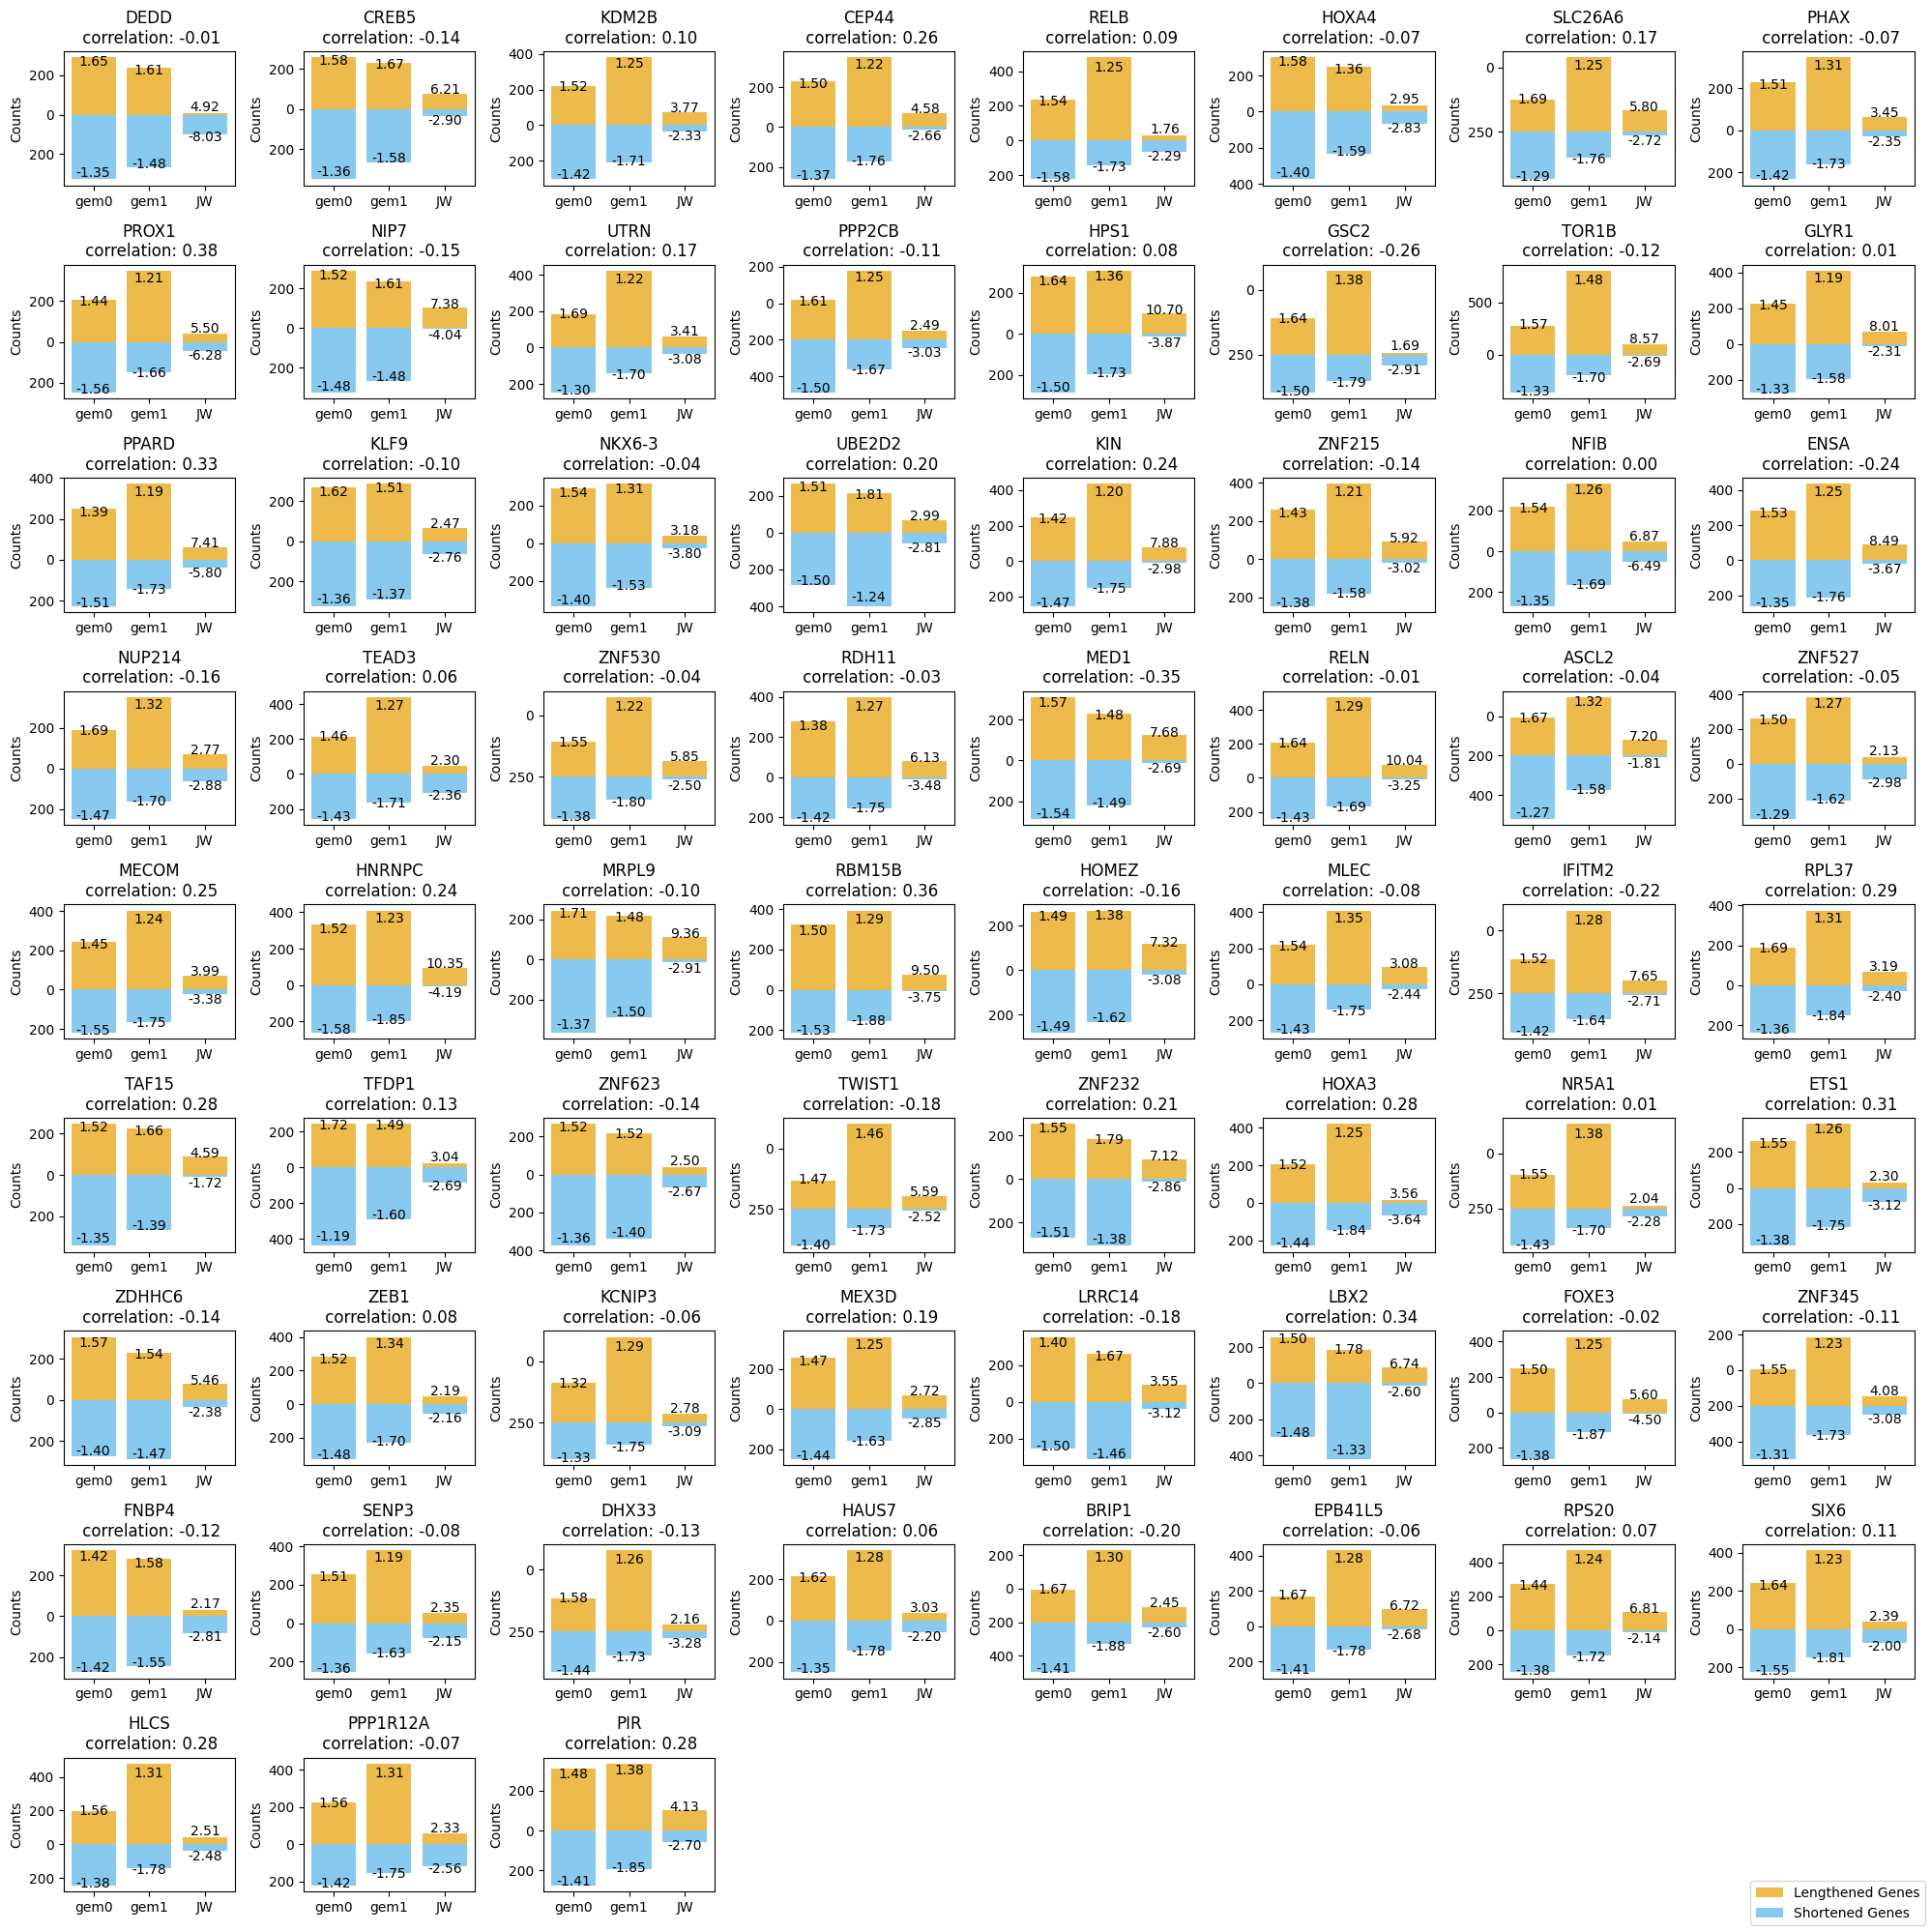

In [35]:
all_genes = gem1_stratified_df['Gene']

fig, axes = plt.subplots(9, 8, figsize=(20, 20))
axes = axes.flatten()

# Loop over each gene to create its own subplot
for idx, gene in enumerate(all_genes):
    ax = axes[idx]
    # Prepare the data for the selected gene from each DataFrame
    gem0_data = gem0_stratified_df[gem0_stratified_df['Gene'] == gene].iloc[0]
    gem1_data = gem1_stratified_df[gem1_stratified_df['Gene'] == gene].iloc[0]
    JW_data = JW_df[JW_df['Gene'] == gene].iloc[0]

    lengthened_values = [gem0_data['lengthened_genes'], gem1_data['lengthened_genes'], JW_data['lengthened_genes']]
    shortened_values = [-gem0_data['shortened_genes'], -gem1_data['shortened_genes'], -JW_data['shortened_genes']]
    distal_APA_effect = [gem0_data['distal_APA_effect'], gem1_data['distal_APA_effect'], JW_data['distal_APA_effect']]
    proximal_APA_effect = [gem0_data['proximal_APA_effect'], gem1_data['proximal_APA_effect'], JW_data['proximal_APA_effect']]

    labels = ['gem0', 'gem1', 'JW']
    
    x = np.arange(len(labels))

    # Create the double-sided bar chart
    ax.bar(x, lengthened_values, color='#E69F00', alpha=0.7)
    ax.bar(x, shortened_values, color='#56B4E9', alpha=0.7)

    # Add APA effect values on top of the bars
    for i, (lengthened, shortened, distal, proximal) in enumerate(zip(lengthened_values, shortened_values, distal_APA_effect, proximal_APA_effect)):
        ax.text(i, lengthened  - 0.2 * abs(lengthened), f'{distal:.2f}', ha='center', va='bottom')
        ax.text(i, shortened + 0.2 * abs(shortened), f'{proximal:.2f}', ha='center', va='top')

    # Set plot title and labels
    ax.set_title(f'{gene}\n correlation: {correlations[gene]:.2f}')
    ax.set_xticks(x)
    # make sure y.ticks are positive
    yticks = ax.get_yticks()
    ax.set_yticklabels([str(abs(int(y))) for y in yticks])
    ax.set_xticklabels(labels)
    ax.set_ylabel('Counts')

# Remove unused subplots
for i in range(len(all_genes), 9 * 8):
    fig.delaxes(axes[i])

# Add one legend for the entire figure
fig.legend(['Lengthened Genes', 'Shortened Genes'], loc='lower right')
plt.tight_layout()
plt.show()


In [37]:
for key, value in correlations.items():
    if value > 0.15:
        print(key, value)

UBE2D2 0.20342052297059804
RBM15B 0.3595220149124504
HLCS 0.2810769062167311
RPL37 0.2940394010447525
KIN 0.2424504230643188
TAF15 0.2816811551549853
SLC26A6 0.17175099475406097
PROX1 0.3836693282194928
CEP44 0.25622714431767046
HOXA3 0.2828153961947807
MEX3D 0.19441085198599692
LBX2 0.33682168684474884
PIR 0.2818935069494634
UTRN 0.17467136337226477
ETS1 0.3124344645664698
MECOM 0.2453069625224953
PPARD 0.32519163995554595
ZNF232 0.21116590434626978
HNRNPC 0.23937284882810303


In [ ]:
RALY
TAF15
transcriptional cofactor
PPARD >> intersting transcription factor, one paper mentions PPAR-y to have APA effect 
ETS1 >> good correlation, its a transcription factor and no data about its roles in RNA processing whatsoever
KIN >> RBP and DBP,  reported interaction with SF3A2 splicing factor AND PABPC1 so it its double esdge sword it can have both APA effect or abundance get_affected_genes_num
LBX2 >>  good correlation, transcription factor, not much data
